<a href="https://colab.research.google.com/github/Daarwinmendez/Text-Regression/blob/main/final_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install datasets
!pip install scikit-learn
!pip install transformers
!pip install tensorflow
!pip install keras
!pip install sentencepiece
!pip install openpyxl
!pip install evaluate
!pip install torch
!pip install kagglehub

In [ ]:
# ==========================================
# Manejo de Datos
# ==========================================
import pandas as pd
import numpy as np

# ==========================================
# Visualización
# ==========================================
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")  # Configuración de estilo para gráficos

# ==========================================
# Conjuntos de Datos y Evaluaciones
# ==========================================
from datasets import load_dataset, Dataset  # Carga de datasets
from evaluate import load  # Métricas de evaluación

# ==========================================
# Machine Learning
# ==========================================
# Modelos de regresión y clasificadores
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor
)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Métricas y Preprocesamiento
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# ==========================================
# Deep Learning
# ==========================================
import tensorflow as tf
from tensorflow import keras  # Keras integrado con TensorFlow
import torch  # PyTorch y manejo de CUDA
import sentencepiece  # Procesamiento de tokenización

# ==========================================
# Modelos de Lenguaje
# ==========================================
import transformers as tr  # Transformadores para NLP
from transformers import (
    pipeline,
    AutoTokenizer,
    AutoModel,
    AutoModelForSequenceClassification,
    AutoModelForTokenClassification
)

# ==========================================
# Manejo de Archivos
# ==========================================
import openpyxl  # Trabajo con archivos Excel

# ==========================================
# Configuración y Utilidades Adicionales
# ==========================================
import os  # Operaciones del sistema
import warnings  # Control de advertencias
import time  # Mediciones de tiempo
import kagglehub  # API de Kaggle para datasets y competiciones

# Ignorar advertencias innecesarias
warnings.filterwarnings("ignore")


In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/datos_nlp/'

In [ ]:
file_path

'/content/drive/MyDrive/datos_nlp/'

In [ ]:
df = pd.read_csv(file_path+"house_prices.csv").reset_index(drop=True)
df =  df.copy().drop(columns=["Index"],  axis=1)

Estos features de entrenamiento fueron tomados de: [House pricing (Kaggle)](https://www.kaggle.com/datasets/juhibhojani/house-price?select=house_prices.csv)

## Data Dictionary para Predicción de Precios de Casas

**1. Price (in rupees)**

* **Descripción:** Representa el precio de la casa en rupias.
* **Tipo de dato:** Numérico (continuo).
* **Ejemplo:** 5,000,000
* **Notas:** Es la variable objetivo (target) que el modelo intentará predecir.

**2. Description**

* **Descripción:** Contiene una descripción textual de la casa, que puede incluir detalles sobre sus características, tamaño, ubicación, etc.
* **Tipo de dato:** Texto.
* **Ejemplo:** "Casa de 3 habitaciones con jardín amplio, ubicada en una zona tranquila."
* **Notas:** Se utilizarán embeddings de texto para representar esta variable en el modelo.

**3. location**

* **Descripción:** Indica la ubicación geográfica de la casa.
* **Tipo de dato:** Categórica.
* **Ejemplo:** "Ciudad A", "Barrio B", "Zona Rural".
* **Notas:** Se utilizarán variables dummy para representar esta variable en el modelo, ya que es categórica.

**4. Status**

* **Descripción:** Representa el estado actual de la casa, como si está lista para mudarse, en construcción o necesita reparaciones.
* **Tipo de dato:** Categórica.
* **Ejemplo:** "Ready to move", "Under construction", "Needs renovation".
* **Notas:** Se utilizarán variables dummy para representar esta variable en el modelo, ya que es categórica.

**5. Bathroom**

* **Descripción:** Indica el número de baños que tiene la casa.
* **Tipo de dato:** Numérico (discreto).
* **Ejemplo:** 2, 3, 4.
* **Notas:** Es una variable numérica que puede influir en el precio de la casa.


**Consideraciones:**

* Este data dictionary describe las variables clave que se utilizarán en el modelo de predicción de precios de casas.
* Se han especificado los tipos de datos y ejemplos para cada variable.
* Se han añadido notas para aclarar cómo se representarán las variables en el modelo (embeddings de texto para "Description" y variables dummy para "location" y "Status").
* Este data dictionary es una base y puede ser modificado o ampliado según tus necesidades y los datos disponibles.




In [ ]:
df.shape

(187531, 20)

In [ ]:
df.head()

,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Title', 'Description', 'Amount(in rupees)', 'Price (in rupees)',
       'location', 'Carpet Area', 'Status', 'Floor', 'Transaction',
       'Furnishing', 'facing', 'overlooking', 'Society', 'Bathroom', 'Balcony',
       'Car Parking', 'Ownership', 'Super Area', 'Dimensions', 'Plot Area'],
      dtype='object')

In [ ]:
df["Description"].isna().sum()
df["location"].isna().sum()
df["Status"].isna().sum(),
df["Bathroom"].isna().sum()
df["Price (in rupees)"].isna().sum()

17665

In [ ]:
feature_selection1 = ["Description", "location", "Status", "Bathroom", "Price (in rupees)"]

In [ ]:
df_alter = df.copy()[feature_selection1].dropna()

In [ ]:

df_filtered = df_alter.loc[df_alter["Bathroom"].apply(lambda x: x.isdigit() if isinstance(x, str) else None)]

In [ ]:
df_filtered.isna().sum()

,0
Description,0
location,0
Status,0
Bathroom,0
Price (in rupees),0


In [ ]:
df_filtered.columns = df_alter.columns.str.lower()

In [ ]:
df_filtered.columns

Index(['description', 'location', 'status', 'bathroom', 'price (in rupees)'], dtype='object')

In [ ]:
df_filtered.head()

,description,location,status,bathroom,price (in rupees)
0,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",thane,Ready to Move,1,6000.0
1,One can find this stunning 2 BHK flat for sale...,thane,Ready to Move,2,13799.0
2,Up for immediate sale is a 2 BHK apartment in ...,thane,Ready to Move,2,17500.0
4,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",thane,Ready to Move,2,18824.0
5,Creatively planned and constructed is a 1 BHK ...,thane,Ready to Move,1,6618.0


In [ ]:
df_filtered.tail()

,description,location,status,bathroom,price (in rupees)
187526,This magnificent 3 BHK Flat is available for s...,zirakpur,Ready to Move,3,3225.0
187527,Have a look at this immaculate 3 BHK flat for ...,zirakpur,Ready to Move,3,3274.0
187528,"Gazipur, Zirakpur has an appealing 3 BHK flat ...",zirakpur,Ready to Move,3,4343.0
187529,Up for immediate sale is a 2 BHK apartment in ...,zirakpur,Ready to Move,2,4231.0
187530,This exquisite 3 BHK Flat is offered for sale ...,zirakpur,Ready to Move,4,6162.0


In [ ]:
print(df_filtered["description"].iloc[1])

One can find this stunning 2 BHK flat for sale in Pokhran Road, Thane. It enjoys an excellent location within the Dosti Vihar. This flat for resale is a choice property. This ready to move flat in Pokhran Road can be availed at a reasonable price of INR 98 Lac. This semi-furnished flat is strategically designed with all the amenities to enhance the living experience. The property is strategically placed near prominent places as near singhaniya school which make for the smooth living of residents.


In [ ]:
print(df_filtered["description"].iloc[-1])

This exquisite 3 BHK Flat is offered for sale in Airport Road, Zirakpur. This flat is situated within the renown township of Affinity Greens. This flat for resale is a choice property. This ready to move flat in Airport Road comes at an affordable price of INR 1.18 Cr. The flat is semi-furnished and is suitable for any family size. this property is located on airport road, zirakpur are some major landmarks near the apartment.


In [ ]:
print(f"First row salary: {df_filtered['price (in rupees)'].iloc[1]}")

First row salary: 13799.0
Last row salary: 6162.0


In [ ]:
print(f"First row Location: {df_filtered['location'].iloc[1]}"),
print(f"Last rown Location: {df_filtered['location'].iloc[-1]}")

First row Location: thane
Last rown Location: zirakpur


Un error común que muchos programadores cometemos al trabajar con embeddings y almacenamiento en la nube es omitir el uso de `random_state` durante el muestreo de datos. Esto puede generar inconsistencias, ya que los embeddings generados en diferentes ejecuciones no serán equivalentes, incluso si se utiliza el mismo conjunto de datos original. Como resultado, el modelo tendrá dificultades para identificar patrones relevantes en los datos, lo que puede afectar su rendimiento.

Por ejemplo, si se entrena un modelo de clasificación de imágenes en Google Cloud AI Platform utilizando un conjunto de datos muestreado aleatoriamente sin `random_state`, al evaluar el modelo con un nuevo muestreo del mismo conjunto de datos, se podrían obtener resultados muy diferentes en términos de precisión o recall.  Esta variabilidad en el rendimiento dificulta la evaluación objetiva del modelo y su posterior despliegue en producción, ya que no se puede garantizar un comportamiento consistente.

In [ ]:
sample_df = df_filtered.sample(2500, random_state=42).reset_index(drop=True)

In [ ]:
sample_df["price (in rupees)"].isna().sum()

0

In [ ]:
text_to_try = sample_df["description"]

price_to_try = sample_df["price (in rupees)"]

In [ ]:
def get_bert_embeddings(texts, batch_size=8, max_length=512):
    """
    Esta función toma un listado de textos y genera los embeddings utilizando el modelo BERT.

    Args:
        texts (list): Lista de textos para los que queremos generar embeddings.
        batch_size (int): Tamaño del lote para procesar los textos en lotes.
        max_length (int): Longitud máxima de los tokens a procesar por texto.

    Returns:
        np.ndarray: Los embeddings de todos los textos procesados en un arreglo numpy.
    """

    # Verificar si CUDA está disponible y usar la GPU si es posible
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Cargar el modelo BERT preentrenado y el tokenizador
    modelo = "bert-base-uncased"
    tokenizer = AutoTokenizer.from_pretrained(modelo)
    model = AutoModel.from_pretrained(modelo)

    # Mover el modelo a la GPU si está disponible
    model.to(device)

    # Lista para almacenar los embeddings de cada lote
    embeddings_list = []

    # Procesamos los textos en lotes
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]

        # Tokenización de los textos en el lote
        inputs = tokenizer(batch, padding=True, truncation=True, return_tensors="pt", max_length=max_length)

        # Mover los tensores de entrada a la GPU si está disponible
        inputs = {key: value.to(device) for key, value in inputs.items()}

        # Obtener los embeddings del modelo BERT (sin gradientes)
        with torch.no_grad():
            outputs = model(**inputs)

        # Promediar los embeddings a lo largo de los tokens (de la última capa oculta)
        embeddings_batch = outputs.last_hidden_state.mean(dim=1).cpu().numpy()

        # Almacenar los embeddings del lote
        embeddings_list.append(embeddings_batch)

    # Concatenar todos los embeddings procesados
    all_embeddings = np.concatenate(embeddings_list, axis=0)

    return all_embeddings

In [ ]:
def get_distilbert_embeddings(texts, batch_size=8, max_length=512):
    """
    Esta función toma un listado de textos y genera los embeddings utilizando el modelo DistilBERT.

    Args:
        texts (list): Lista de textos para los que queremos generar embeddings.
        batch_size (int): Tamaño del lote para procesar los textos en lotes.
        max_length (int): Longitud máxima de los tokens a procesar por texto.

    Returns:
        np.ndarray: Los embeddings de todos los textos procesados en un arreglo numpy.
    """

    # Verificar si CUDA está disponible y usar la GPU si es posible
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Cargar el modelo DistilBERT preentrenado y el tokenizador
    modelo = "distilbert-base-uncased"
    tokenizer = AutoTokenizer.from_pretrained(modelo)
    model = AutoModel.from_pretrained(modelo)

    # Mover el modelo a la GPU si está disponible
    model.to(device)

    # Lista para almacenar los embeddings de cada lote
    embeddings_list = []

    # Procesamos los textos en lotes
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]

        # Tokenización de los textos en el lote
        inputs = tokenizer(batch, padding=True, truncation=True, return_tensors="pt", max_length=max_length)

        # Mover los tensores de entrada a la GPU si está disponible
        inputs = {key: value.to(device) for key, value in inputs.items()}

        # Obtener los embeddings del modelo DistilBERT (sin gradientes)
        with torch.no_grad():
            outputs = model(**inputs)

        # Promediar los embeddings a lo largo de los tokens (de la última capa oculta)
        embeddings_batch = outputs.last_hidden_state.mean(dim=1).cpu().numpy()

        # Almacenar los embeddings del lote
        embeddings_list.append(embeddings_batch)

    # Concatenar todos los embeddings procesados
    all_embeddings = np.concatenate(embeddings_list, axis=0)

    return all_embeddings


In [ ]:
def get_roberta_embeddings(texts, batch_size=8, max_length=512):
    """
    Esta función toma un listado de textos y genera los embeddings utilizando el modelo RoBERTa.

    Args:
        texts (list): Lista de textos para los que queremos generar embeddings.
        batch_size (int): Tamaño del lote para procesar los textos en lotes.
        max_length (int): Longitud máxima de los tokens a procesar por texto.

    Returns:
        np.ndarray: Los embeddings de todos los textos procesados en un arreglo numpy.
    """

    # Verificar si CUDA está disponible y usar la GPU si es posible
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Cargar el modelo RoBERTa preentrenado y el tokenizador
    modelo = "roberta-base"
    tokenizer = AutoTokenizer.from_pretrained(modelo)
    model = AutoModel.from_pretrained(modelo)

    # Mover el modelo a la GPU si está disponible
    model.to(device)

    # Lista para almacenar los embeddings de cada lote
    embeddings_list = []

    # Procesamos los textos en lotes
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]

        # Tokenización de los textos en el lote
        inputs = tokenizer(batch, padding=True, truncation=True, return_tensors="pt", max_length=max_length)

        # Mover los tensores de entrada a la GPU si está disponible
        inputs = {key: value.to(device) for key, value in inputs.items()}

        # Obtener los embeddings del modelo RoBERTa (sin gradientes)
        with torch.no_grad():
            outputs = model(**inputs)

        # Promediar los embeddings a lo largo de los tokens (de la última capa oculta)
        embeddings_batch = outputs.last_hidden_state.mean(dim=1).cpu().numpy()

        # Almacenar los embeddings del lote
        embeddings_list.append(embeddings_batch)

    # Concatenar todos los embeddings procesados
    all_embeddings = np.concatenate(embeddings_list, axis=0)

    return all_embeddings

In [ ]:
'''def tokenize(modelo, datos, max_length):
  """
  Toma un modelo y datos y los tokeniza con el modelo pasado en parametros, retorna los tokens.
  """
  tokenizer = AutoTokenizer.from_pretrained(modelo)

  inputs = tokenizer(datos, padding=True, truncation=True, return_tensors="pt", max_length=max_length)

  # Obtener las palabras
  tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
  return tokens'''

'def tokenize(modelo, datos, max_length):\n  """\n  Toma un modelo y datos y los tokeniza con el modelo pasado en parametros, retorna los tokens.\n  """\n  tokenizer = AutoTokenizer.from_pretrained(modelo)\n\n  inputs = tokenizer(datos, padding=True, truncation=True, return_tensors="pt", max_length=max_length)\n\n  # Obtener las palabras\n  tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])\n  return tokens'

In [ ]:
#tokenize("bert-base-uncased", text_to_try.tolist(), 512)
scaler = StandardScaler()

In [ ]:
def escalar_datos(datos):
  """
  Toma un arrreglo y lo escala.
  """
  datos = scaler.fit_transform(datos.values.reshape(-1, 1))
  return datos

In [ ]:
def desescalar_datos(datos):
  """
  Toma un arrreglo y lo desescala.
  """
  return scaler.inverse_transform(datos)

In [ ]:
from sklearn.preprocessing import StandardScaler
escaler = StandardScaler()

In [ ]:

if "house_embeddings_bert.npy" not in os.listdir(file_path) or "house_embeddings_distilbert.npy" not in os.listdir(file_path) or "house_embeddings_roberta.npy" not in os.listdir(file_path):
  print("No hay embeddings, generandolos...")
  batch_bert = get_bert_embeddings(text_to_try.tolist())
  batch_distilbert = get_distilbert_embeddings(text_to_try.tolist())
  batch_roberta = get_roberta_embeddings(text_to_try.tolist())

  # Descargandolos
  np.save(f"{file_path}house_embeddings_bert.npy", batch_bert)
  np.save(f"{file_path}house_embeddings_distilbert.npy", batch_distilbert)
  np.save(f"{file_path}house_embeddings_roberta.npy", batch_roberta)

else:

  mensaje = "Hay embeddings, cargandolos..."
  display(mensaje)
  batch_bert = np.load(f"{file_path}house_embeddings_bert.npy")
  batch_distilbert = np.load(f"{file_path}house_embeddings_distilbert.npy")
  batch_roberta = np.load(f"{file_path}house_embeddings_roberta.npy")
  del mensaje
  display("Embeddings cargados")

'Hay embeddings, cargandolos...'

'Embeddings cargados'

In [ ]:
batch_bert.shape

(2500, 768)

In [ ]:
location_dummies = pd.get_dummies(sample_df["location"], prefix="location").astype(int)
status_dummies = pd.get_dummies(sample_df["status"], prefix="status").astype(int)

# Sin dummies
bathrooms = [samp for samp in sample_df["bathroom"].to_list() if samp.isdigit()]
bathrooms = pd.DataFrame({"prrice (in rupees)": bathrooms})

In [ ]:
bathrooms.shape

(2500, 1)

In [ ]:
location_dummies.shape

(2500, 71)

In [ ]:
status_dummies.shape

(2500, 1)

In [ ]:
status_dummies.value_counts(normalize=True)

,proportion
status_Ready to Move,
1,1.0


In [ ]:
text_to_try.shape

(2500,)

In [ ]:
# Convertir embeddings a DataFrames si no lo son
batch_bert = pd.DataFrame(batch_bert)
batch_distilbert = pd.DataFrame(batch_distilbert)
batch_roberta = pd.DataFrame(batch_roberta)


# Concatenar
batch_bert_with_dummies = pd.concat([batch_bert, location_dummies, status_dummies, bathrooms, sample_df["price (in rupees)"]], axis=1)
batch_distilbert_with_dummies = pd.concat([batch_distilbert, location_dummies, status_dummies, bathrooms,  sample_df["price (in rupees)"] ], axis=1)
batch_roberta_with_dummies = pd.concat([batch_roberta, location_dummies, status_dummies, bathrooms, sample_df["price (in rupees)"]], axis=1)

In [ ]:
batch_roberta_with_dummies.shape # Observando la forma de el embeddings roberta con dummies

(2500, 842)

In [ ]:
batch_bert_with_dummies.shape  # Observando la forma de el embeddings bert con dummies

(2500, 842)

In [ ]:
batch_bert_with_dummies["price (in rupees)"].isnull().sum()

0

In [ ]:
batch_distilbert_with_dummies.columns

Index([                       0,                        1,
                              2,                        3,
                              4,                        5,
                              6,                        7,
                              8,                        9,
       ...
            'location_vadodara',          'location_vapi',
            'location_varanasi',    'location_vijayawada',
       'location_visakhapatnam',     'location_vrindavan',
            'location_zirakpur',   'status_Ready to Move',
           'prrice (in rupees)',      'price (in rupees)'],
      dtype='object', length=842)

In [ ]:
batch_bert_with_dummies

0         1         2         3         4         5         6  \
0    -0.022713 -0.380177  0.345787 -0.167902  0.730873 -0.225888 -0.239661   
1     0.100692 -0.320953  0.360834 -0.204812  0.625765 -0.085982 -0.204748   
2     0.105003 -0.318839  0.408727 -0.235531  0.797577 -0.100718 -0.129350   
3     0.159002 -0.261471  0.418039  0.106422  0.437681  0.050729 -0.171945   
4    -0.047923 -0.268455  0.354820 -0.133128  0.800255 -0.039310 -0.221252   
...        ...       ...       ...       ...       ...       ...       ...   
2495  0.020524 -0.326950  0.551632 -0.158779  0.562531 -0.020454 -0.204232   
2496  0.043000 -0.134176  0.284343 -0.230147  0.619900 -0.167144 -0.197156   
2497  0.015757 -0.334148  0.320616 -0.254170  0.701382 -0.100449 -0.180219   
2498  0.029518 -0.378141  0.428094 -0.176213  0.692282 -0.091511 -0.217624   
2499  0.040718 -0.262730  0.326524 -0.202955  0.805440 -0.198370 -0.180999   

             7         8         9        10        11        12        13  \
0     0.444998  0.204019 -0.256950 -0.178707 -0.565994 -0.227672  0.517710   
1     0.255190  0.142493 -0.254996 -0.109355 -0.338900 -0.177106  0.449307   
2     0.452296  0.187113 -0.274582 -0.023386 -0.526743 -0.171899  0.723474   
3     0.074070  0.205866 -0.132216 -0.207157 -0.217442 -0.011529  0.423196   
4     0.415437  0.242952 -0.426302 -0.065662 -0.476774 -0.190502  0.612568   
...        ...       ...       ...       ...       ...       ...       ...   
2495  0.376912  0.128346 -0.255549 -0.196153 -0.496226 -0.228841  0.460533   
2496  0.387305  0.232256 -0.298450 -0.142352 -0.369022 -0.093163  0.486401   
2497  0.440816  0.103377 -0.345267 -0.098937 -0.602482 -0.207865  0.500149   
2498  0.286576  0.206840 -0.282826 -0.243757 -0.402575 -0.160639  0.510055   
2499  0.413211  0.193880 -0.335685  0.013516 -0.493656 -0.238516  0.529266   

            14        15        16        17        18        19        20  \
0     0.094311  0.251627  0.292149  0.147179 -0.293547  0.127398  0.312754   
1    -0.000680  0.263405  0.134518  0.208973 -0.022946  0.100823  0.256213   
2     0.083470  0.384745  0.297274  0.290520 -0.191224  0.242692  0.380283   
3     0.262665  0.231881  0.197087  0.153359 -0.225322  0.048355  0.144659   
4     0.175760  0.319612  0.238106  0.196212 -0.290595  0.247723  0.336736   
...        ...       ...       ...       ...       ...       ...       ...   
2495  0.143303  0.316086  0.256154  0.139200 -0.191689  0.166374  0.314154   
2496  0.112928  0.218372  0.262845  0.204778 -0.295555  0.019704  0.348052   
2497  0.139358  0.288422  0.414104  0.136735 -0.247768  0.162248  0.323373   
2498  0.260847  0.250907  0.274833  0.162090 -0.279718  0.200727  0.283931   
2499  0.083998  0.194610  0.431784  0.268673 -0.165408  0.140529  0.275228   

            21        22        23        24        25        26        27  \
0    -0.081565 -0.018358  0.506640  0.335052  0.098822  0.325926  0.259963   
1    -0.163928  0.114350  0.325086  0.146547  0.034140  0.383297  0.106554   
2    -0.121169 -0.027343  0.356199  0.194662  0.169187  0.283055  0.161184   
3    -0.238671  0.180507  0.108884  0.118576  0.068700  0.435694  0.067055   
4    -0.062928  0.069394  0.438388  0.329857  0.137163  0.402860  0.308892   
...        ...       ...       ...       ...       ...       ...       ...   
2495 -0.191987 -0.038229  0.346910  0.264360  0.136720  0.169764  0.219469   
2496 -0.092617  0.098399  0.326980  0.241994  0.036980  0.323040  0.115313   
2497 -0.013831 -0.050920  0.405914  0.280612  0.103372  0.283678  0.305993   
2498 -0.061844  0.085834  0.264473  0.247099  0.035314  0.330609  0.275699   
2499 -0.092958 -0.085853  0.405544  0.132428  0.125362  0.384699  0.333078   

            28        29        30        31        32        33        34  \
0    -0.193253  0.174390  0.288942  0.028323 -0.026968 -0.035326  0.500466   
1    -0.316873  0.049597  0.169415  0.137254 -0.135569 -0.047836  0.295337   
2    -0.213590  0.150666  0.097

In [ ]:
np.sum(batch_bert_with_dummies.isna().sum().values) # Hay valores nulos en todo el dataset?

0

In [ ]:
batch_distilbert_with_dummies.columns

Index([                       0,                        1,
                              2,                        3,
                              4,                        5,
                              6,                        7,
                              8,                        9,
       ...
            'location_vadodara',          'location_vapi',
            'location_varanasi',    'location_vijayawada',
       'location_visakhapatnam',     'location_vrindavan',
            'location_zirakpur',   'status_Ready to Move',
           'prrice (in rupees)',      'price (in rupees)'],
      dtype='object', length=842)

In [ ]:
def col_to_string(dataframe):
  """
  Toma un dataframe y convierte las columnas que están en el embeddings a string
  """

  dataframe = dataframe.copy()
  counter = 0
  for col in dataframe.columns:
    if str(col).isdigit():  # Verifica si el nombre de la columna es numérico
      dataframe = dataframe.rename(columns={col: f"col_{col}"})  # Renombra la columna
      dataframe[f"col_{col}"] = dataframe[f"col_{col}"].astype(str)  # Convierte la columna a string
      counter += 1

  print(f"Se convirtieron {counter} columnas a string")
  return dataframe

In [ ]:
import inspect

def get_var_name(var):
    """
    Toma una variable y devuelve su nombre en string
    """
    current_frame = inspect.currentframe()
    caller_frame = inspect.getouterframes(current_frame)[1]
    local_vars = caller_frame.frame.f_locals

    for name, value in local_vars.items():
        if value is var:
            return name

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


### Prueba aleatoria

In [ ]:
#embedding.columns = embedding.columns.astype(str)
X = col_to_string(batch_distilbert_with_dummies).drop("price (in rupees)", axis=1).to_numpy()
y = escalar_datos(batch_distilbert_with_dummies["price (in rupees)"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = KNeighborsRegressor()
start_train = time.time()
regressor.fit(X_train, y_train)
train_time = time.time() - start_train

start_inference = time.time()
y_pred = regressor.predict(X_test)
inference_time = time.time() - start_inference
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Desescalar y_pred e y_test usando el mismo scaler
y_pred_desescalado = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_desescalado = scaler.inverse_transform(y_test.reshape(-1, 1))

# Crear el DataFrame para la visualización
results_df = pd.DataFrame({"predicted_values": y_pred_desescalado.flatten(),
                           "actual_values": y_test_desescalado.flatten()})

display(results_df)



print(f"Modelo: {KNeighborsRegressor.__name__}")
print(f"Embeddings: {get_var_name(batch_distilbert_with_dummies)}")
print(f"Tamaño del dataset: {batch_distilbert_with_dummies.shape}")
print(f"Training time: {train_time}")
print(f"Inference time: {inference_time}")
print(f"R2: {r2}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

Se convirtieron 768 columnas a string


,predicted_values,actual_values
0,5061.6,5648.0
1,13333.0,13333.0
2,3647.0,3647.0
3,3200.0,3200.0
4,4414.8,4651.0
...,...,...
495,4200.4,3714.0
496,7987.0,7987.0
497,3435.4,3969.0
498,11167.0,11167.0


Modelo: KNeighborsRegressor
Embeddings: batch_distilbert_with_dummies
Tamaño del dataset: (2500, 842)
Training time: 0.45711255073547363
Inference time: 0.10683059692382812
R2: 0.6759579197351455
MAE: 0.2196695840200437
RMSE: 0.5450395259776409


In [ ]:
train_dict = {
    "modelos": [LinearRegression, DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, KNeighborsRegressor, SVR],
    "embeddings": [batch_bert_with_dummies, batch_distilbert_with_dummies, batch_roberta_with_dummies]
}


results_dict = {
    "evidence": {
        "predicted_values": [],
        "actual_values": []
        },
    "modelos": [],
    "embeddings": [],
    "Tamaño del dataset": [],
    "R2": [],
    "MAE": [],
    "RMSE": [],
    "Inference time": [],
    "Training time": [],
}

for  modelo in train_dict["modelos"]:
  for embedding in train_dict["embeddings"]:
    X = col_to_string(embedding).drop("price (in rupees)", axis=1).to_numpy()
    y = escalar_datos(embedding["price (in rupees)"])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    regressor = modelo()
    # --- Tiempo de entrenamiento
    print(f"Ajustando {get_var_name(regressor)}...")
    start_train = time.time()
    regressor.fit(X_train, y_train)
    train_time = time.time() - start_train

    # --- Tiempo de inferencia
    print(f"Calculando tiempo de inferencia...")
    start_inference = time.time()
    y_pred = regressor.predict(X_test)
    inference_time = time.time() - start_inference


    # --- Crear el conjunto de evidencia
    print("Creando el conjunto de evidencia...")
    y_pred_desescalado = scaler.inverse_transform(y_pred.reshape(-1, 1))
    y_test_desescalado = scaler.inverse_transform(y_test.reshape(-1, 1))


    # --- Evaluar
    print("Evaluando resultados...")
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))



    ### -------- INSERTANDO LA DATA -----
    print("Extrayendo Data...")
    results_dict["evidence"]["predicted_values"].append(y_pred_desescalado.flatten())
    results_dict["evidence"]["actual_values"].append(y_test_desescalado.flatten())
    results_dict["modelos"].append(modelo.__name__)
    results_dict["embeddings"].append(get_var_name(embedding))
    results_dict["Tamaño del dataset"].append(embedding.shape)
    results_dict["Training time"].append(train_time)
    results_dict["Inference time"].append(inference_time)
    results_dict["R2"].append(r2)
    results_dict["MAE"].append(mae)
    results_dict["RMSE"].append(rmse)

    print("Done ✅🤠")

Se convirtieron 768 columnas a string
Ajustando regressor...
Calculando tiempo de inferencia...
Creando el conjunto de evidencia...
Evaluando resultados...
Extrayendo Data...
Done ✅🤠
Se convirtieron 768 columnas a string
Ajustando regressor...
Calculando tiempo de inferencia...
Creando el conjunto de evidencia...
Evaluando resultados...
Extrayendo Data...
Done ✅🤠
Se convirtieron 768 columnas a string
Ajustando regressor...
Calculando tiempo de inferencia...
Creando el conjunto de evidencia...
Evaluando resultados...
Extrayendo Data...
Done ✅🤠
Se convirtieron 768 columnas a string
Ajustando regressor...
Calculando tiempo de inferencia...
Creando el conjunto de evidencia...
Evaluando resultados...
Extrayendo Data...
Done ✅🤠
Se convirtieron 768 columnas a string
Ajustando regressor...
Calculando tiempo de inferencia...
Creando el conjunto de evidencia...
Evaluando resultados...
Extrayendo Data...
Done ✅🤠
Se convirtieron 768 columnas a string
Ajustando regressor...
Calculando tiempo de inf

In [ ]:
results_to_show = {

}
for key, value in results_dict.items():
  if key != "evidence":
    results_to_show[key] = value

In [ ]:
results_dfn = pd.DataFrame(results_to_show)

In [ ]:
results_dfn

,modelos,embeddings,Tamaño del dataset,R2,MAE,RMSE,Inference time,Training time
0,LinearRegression,batch_bert_with_dummies,"(2500, 842)",0.129341,0.499181,0.893411,0.114799,0.779102
1,LinearRegression,batch_distilbert_with_dummies,"(2500, 842)",0.340167,0.460663,0.777758,0.115541,0.718113
2,LinearRegression,batch_roberta_with_dummies,"(2500, 842)",-0.388099,0.528551,1.128074,0.122474,0.642578
3,DecisionTreeRegressor,batch_bert_with_dummies,"(2500, 842)",0.414564,0.284058,0.732600,0.088103,3.149413
4,DecisionTreeRegressor,batch_distilbert_with_dummies,"(2500, 842)",0.288799,0.304444,0.807464,0.090348,3.065781
5,DecisionTreeRegressor,batch_roberta_with_dummies,"(2500, 842)",0.129864,0.340860,0.893143,0.088159,3.190115
6,RandomForestRegressor,batch_bert_with_dummies,"(2500, 842)",0.718282,0.223744,0.508200,0.105899,170.933828
7,RandomForestRegressor,batch_distilbert_with_dummies,"(2500, 842)",0.715073,0.232089,0.511087,0.105156,167.531449
8,RandomForestRegressor,batch_roberta_with_dummies,"(2500, 842)",0.689864,0.229566,0.533217,0.103916,162.132819
9,GradientBoostingRegressor,batch_bert_with_dummies,"(2500, 842)",0.706069,0.281399,0.519099,0.090101,58.901891


array(['LinearRegression', 'DecisionTreeRegressor',
       'RandomForestRegressor', 'GradientBoostingRegressor',
       'AdaBoostRegressor', 'KNeighborsRegressor', 'SVR'], dtype=object)

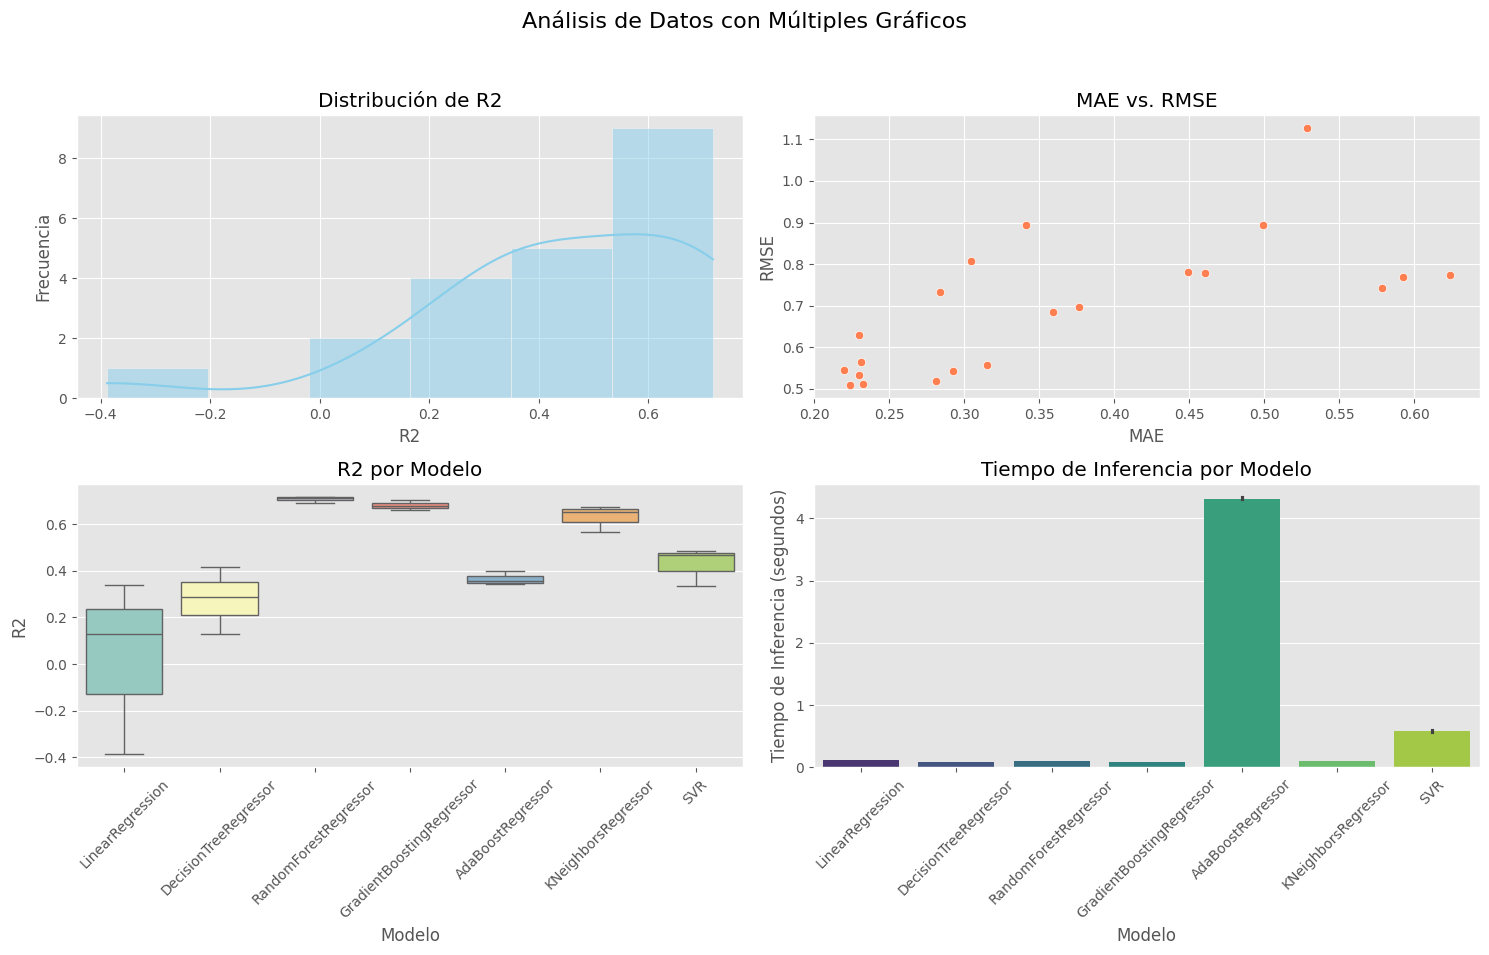

In [ ]:
# Configuración para múltiples subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 filas, 2 columnas de gráficos
fig.suptitle("Análisis de Datos con Múltiples Gráficos", fontsize=16)

# Gráfico 1: Distribución de precios (Histograma)
sns.histplot(results_dfn["R2"], ax=axes[0, 0], kde=True, color='skyblue')
axes[0, 0].set_title("Distribución de R2")
axes[0, 0].set_xlabel("R2")
axes[0, 0].set_ylabel("Frecuencia")

# Gráfico 2: MAE vs. RMSE (Scatter Plot)
sns.scatterplot(x="MAE", y="RMSE", data=results_dfn, ax=axes[0, 1], color='coral')
axes[0, 1].set_title("MAE vs. RMSE")
axes[0, 1].set_xlabel("MAE")
axes[0, 1].set_ylabel("RMSE")

# Gráfico 3: R2 por modelo (Box Plot)
sns.boxplot(x="modelos", y="R2", data=results_dfn, ax=axes[1, 0], palette='Set3')
axes[1, 0].set_title("R2 por Modelo")
axes[1, 0].set_xlabel("Modelo")
axes[1, 0].set_ylabel("R2")
axes[1, 0].tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x

# Gráfico 4: Tiempo de inferencia por modelo (Bar Plot)
sns.barplot(x="modelos", y="Inference time", data=results_dfn, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title("Tiempo de Inferencia por Modelo")
axes[1, 1].set_xlabel("Modelo")
axes[1, 1].set_ylabel("Tiempo de Inferencia (segundos)")
axes[1, 1].tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x

# Ajustar el espaciado entre subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar para el título principal
plt.show()  # Mostrar la figura con los subplots

In [ ]:
benchmark_df = results_dfn.copy()

In [ ]:
benchmark_df

,modelos,embeddings,Tamaño del dataset,R2,MAE,RMSE,Inference time,Training time
0,LinearRegression,batch_bert_with_dummies,"(2500, 842)",0.129341,0.499181,0.893411,0.114799,0.779102
1,LinearRegression,batch_distilbert_with_dummies,"(2500, 842)",0.340167,0.460663,0.777758,0.115541,0.718113
2,LinearRegression,batch_roberta_with_dummies,"(2500, 842)",-0.388099,0.528551,1.128074,0.122474,0.642578
3,DecisionTreeRegressor,batch_bert_with_dummies,"(2500, 842)",0.414564,0.284058,0.732600,0.088103,3.149413
4,DecisionTreeRegressor,batch_distilbert_with_dummies,"(2500, 842)",0.288799,0.304444,0.807464,0.090348,3.065781
5,DecisionTreeRegressor,batch_roberta_with_dummies,"(2500, 842)",0.129864,0.340860,0.893143,0.088159,3.190115
6,RandomForestRegressor,batch_bert_with_dummies,"(2500, 842)",0.718282,0.223744,0.508200,0.105899,170.933828
7,RandomForestRegressor,batch_distilbert_with_dummies,"(2500, 842)",0.715073,0.232089,0.511087,0.105156,167.531449
8,RandomForestRegressor,batch_roberta_with_dummies,"(2500, 842)",0.689864,0.229566,0.533217,0.103916,162.132819
9,GradientBoostingRegressor,batch_bert_with_dummies,"(2500, 842)",0.706069,0.281399,0.519099,0.090101,58.901891


In [ ]:
insights = {
    "LinearRegression": """
        - **Modelo lineal simple:** Asume una relación lineal entre las características y el precio de la casa.
        - **Bajo rendimiento en este caso:** El R2 bajo (0.129341 con BERT, 0.340167 con DistilBERT) indica que el modelo no captura bien la complejidad de los datos.
        - **Posiblemente las relaciones no son lineales:** Sugiere que las características y el precio de la casa no tienen una relación lineal simple, por lo que un modelo lineal no es la mejor opción.
        - **Ejemplo:** Un modelo lineal podría predecir que el precio de una casa aumenta constantemente con el tamaño, pero en realidad, el precio podría aumentar más rápido para casas de cierto tamaño y luego estabilizarse.
    """,
    "DecisionTreeRegressor": """
        - **Árbol de decisión:** Divide los datos en subconjuntos basados en reglas simples, creando un "árbol" de decisiones.
        - **Rendimiento moderado:** R2 alrededor de 0.414564 con BERT, 0.288799 con DistilBERT, lo que indica una mejor captura de patrones que la regresión lineal.
        - **Propenso al sobreajuste:** Puede memorizar los datos de entrenamiento y no generalizar bien a nuevos datos.
        - **Necesidad de pruning o ensembles:** Se recomienda usar técnicas como pruning o ensembles (como Random Forest) para mitigar el sobreajuste.
        - **Ejemplo:** Un árbol de decisión podría aprender reglas muy específicas para los precios de las casas en el conjunto de entrenamiento, pero fallar al predecir el precio de una casa con características ligeramente diferentes.
    """,
    "RandomForestRegressor": """
        - **Conjunto de árboles de decisión:** Combina múltiples árboles de decisión para obtener una predicción más robusta.
        - **Mejor rendimiento:** R2 de 0.718282 con BERT, mostrando una mejora significativa sobre los modelos anteriores.
        - **Reduce el sobreajuste:** Al promediar las predicciones de múltiples árboles, se reduce el impacto del sobreajuste de árboles individuales.
        - **Buen candidato para este problema:** Su alto rendimiento y robustez lo convierten en un buen candidato para predecir el precio de la casa en este caso.
        - **Ejemplo:** Un Random Forest podría combinar las predicciones de varios árboles que consideran diferentes características y reglas, lo que resulta en una predicción más precisa y generalizable.
    """,
    "GradientBoostingRegressor": """
        - **Boosting de gradientes:** Combina múltiples modelos débiles (árboles de decisión) de forma secuencial, corrigiendo los errores del modelo anterior.
        - **Alto rendimiento:** Generalmente ofrece un alto rendimiento en tareas de regresión.
        - **Robusto:** Menos propenso al sobreajuste que los árboles de decisión individuales.
        - **Potencialmente el mejor modelo:** Su alto rendimiento y robustez lo convierten en un candidato ideal para este problema.
        - **Ejemplo:** Un Gradient Boosting podría comenzar con un árbol de decisión simple y luego agregar árboles adicionales que se enfocan en las casas que el modelo anterior predijo incorrectamente.
    """,
    "AdaBoostRegressor": """
        - **Boosting adaptativo:** Similar a Gradient Boosting, pero ajusta los pesos de los datos de entrenamiento para enfocarse en las instancias difíciles de predecir.
        - **Rendimiento moderado:** Generalmente ofrece un rendimiento decente, pero puede ser superado por Gradient Boosting.
        - **Sensible a outliers:** Puede verse afectado negativamente por valores atípicos en los datos.
        - **Considerar si hay outliers:** Se recomienda preprocesar los datos para manejar outliers si se usa este modelo.
        - **Ejemplo:** AdaBoost podría dar más peso a las casas con precios inusualmente altos o bajos, lo que podría afectar la precisión del modelo para casas con precios más típicos.
    """,
    "KNeighborsRegressor": """
        - **Vecinos más cercanos:** Predice el precio de una casa basándose en los precios de las casas más similares en el conjunto de entrenamiento.
        - **Rendimiento variable:** Puede ser efectivo si las características son relevantes y la escala de los datos es adecuada.
        - **Sensible a la escala:** Requiere que las características estén en la misma escala para evitar que las características con valores más grandes dominen la distancia.
        - **Escalar las características:** Se recomienda escalar las características antes de usar este modelo.
        - **Ejemplo:** KNeighbors podría predecir que una casa es cara solo porque tiene una gran cantidad de baños, sin considerar otras características importantes como el tamaño o la ubicación. Escalar las características ayuda a evitar este problema.
        - **En este caso:** El rendimiento puede verse afectado por la dimensionalidad de los embeddings y la presencia de características categóricas. Considerar técnicas de reducción de dimensionalidad o codificación de variables categóricas.
    """,
    "SVR": """
        - **Máquinas de vectores de soporte:** Encuentra un hiperplano que mejor separa los datos en diferentes clases o predice valores continuos.
        - **Rendimiento variable:** Depende en gran medida de la elección del kernel y los hiperparámetros.
        - **Sensible a la elección del kernel:** El kernel define cómo se transforman los datos para encontrar el hiperplano óptimo.
        - **Ajustar hiperparámetros:** Se recomienda experimentar con diferentes kernels y ajustar los hiperparámetros para obtener el mejor rendimiento.
        - **Ejemplo:** Un SVR con un kernel lineal podría no ser adecuado para datos con relaciones no lineales. Un kernel polinomial o RBF podría ser más efectivo en esos casos.
        - **En este caso:**  Puede ser beneficioso probar diferentes kernels y ajustar los hiperparámetros para optimizar el rendimiento en la predicción de precios de casas.
    """
}

In [ ]:
benchmark_df["Insights"] = benchmark_df["modelos"].map(insights)

In [ ]:
benchmark_df

,modelos,embeddings,Tamaño del dataset,R2,MAE,RMSE,Inference time,Training time,Insights
0,LinearRegression,batch_bert_with_dummies,"(2500, 842)",0.129341,0.499181,0.893411,0.114799,0.779102,\n - **Modelo lineal simple:** Asume un...
1,LinearRegression,batch_distilbert_with_dummies,"(2500, 842)",0.340167,0.460663,0.777758,0.115541,0.718113,\n - **Modelo lineal simple:** Asume un...
2,LinearRegression,batch_roberta_with_dummies,"(2500, 842)",-0.388099,0.528551,1.128074,0.122474,0.642578,\n - **Modelo lineal simple:** Asume un...
3,DecisionTreeRegressor,batch_bert_with_dummies,"(2500, 842)",0.414564,0.284058,0.732600,0.088103,3.149413,\n - **Árbol de decisión:** Divide los ...
4,DecisionTreeRegressor,batch_distilbert_with_dummies,"(2500, 842)",0.288799,0.304444,0.807464,0.090348,3.065781,\n - **Árbol de decisión:** Divide los ...
5,DecisionTreeRegressor,batch_roberta_with_dummies,"(2500, 842)",0.129864,0.340860,0.893143,0.088159,3.190115,\n - **Árbol de decisión:** Divide los ...
6,RandomForestRegressor,batch_bert_with_dummies,"(2500, 842)",0.718282,0.223744,0.508200,0.105899,170.933828,\n - **Conjunto de árboles de decisión:...
7,RandomForestRegressor,batch_distilbert_with_dummies,"(2500, 842)",0.715073,0.232089,0.511087,0.105156,167.531449,\n - **Conjunto de árboles de decisión:...
8,RandomForestRegressor,batch_roberta_with_dummies,"(2500, 842)",0.689864,0.229566,0.533217,0.103916,162.132819,\n - **Conjunto de árboles de decisión:...
9,GradientBoostingRegressor,batch_bert_with_dummies,"(2500, 842)",0.706069,0.281399,0.519099,0.090101,58.901891,\n - **Boosting de gradientes:** Combin...


In [ ]:
benchmark_df.to_csv("benchmark_df.csv", index=False)

#### Mejor modelo?


In [ ]:
benchmark_df.sort_values(by="R2", ascending=False)

,modelos,embeddings,Tamaño del dataset,R2,MAE,RMSE,Inference time,Training time,Insights
6,RandomForestRegressor,batch_bert_with_dummies,"(2500, 842)",0.718282,0.223744,0.508200,0.105899,170.933828,\n - **Conjunto de árboles de decisión:...
7,RandomForestRegressor,batch_distilbert_with_dummies,"(2500, 842)",0.715073,0.232089,0.511087,0.105156,167.531449,\n - **Conjunto de árboles de decisión:...
9,GradientBoostingRegressor,batch_bert_with_dummies,"(2500, 842)",0.706069,0.281399,0.519099,0.090101,58.901891,\n - **Boosting de gradientes:** Combin...
8,RandomForestRegressor,batch_roberta_with_dummies,"(2500, 842)",0.689864,0.229566,0.533217,0.103916,162.132819,\n - **Conjunto de árboles de decisión:...
11,GradientBoostingRegressor,batch_roberta_with_dummies,"(2500, 842)",0.678026,0.292385,0.543297,0.090742,59.809313,\n - **Boosting de gradientes:** Combin...
16,KNeighborsRegressor,batch_distilbert_with_dummies,"(2500, 842)",0.675958,0.219670,0.545040,0.101349,0.467301,\n - **Vecinos más cercanos:** Predice ...
10,GradientBoostingRegressor,batch_distilbert_with_dummies,"(2500, 842)",0.662272,0.315352,0.556430,0.090215,59.336551,\n - **Boosting de gradientes:** Combin...
17,KNeighborsRegressor,batch_roberta_with_dummies,"(2500, 842)",0.653177,0.230890,0.563873,0.100945,0.461617,\n - **Vecinos más cercanos:** Predice ...
15,KNeighborsRegressor,batch_bert_with_dummies,"(2500, 842)",0.568657,0.229623,0.628838,0.100017,0.343072,\n - **Vecinos más cercanos:** Predice ...
18,SVR,batch_bert_with_dummies,"(2500, 842)",0.487470,0.359053,0.685468,0.562859,1.365555,\n - **Máquinas de vectores de soporte:...


In [ ]:
mejor_modelo = benchmark_df.iloc[benchmark_df["R2"].idxmax()]

In [ ]:
mejor_modelo

,6
modelos,RandomForestRegressor
embeddings,batch_bert_with_dummies
Tamaño del dataset,"(2500, 842)"
R2,0.718282
MAE,0.223744
RMSE,0.5082
Inference time,0.105899
Training time,170.933828
Insights,\n - **Conjunto de árboles de decisión:...


In [ ]:
print(mejor_modelo["Insights"])


        - **Conjunto de árboles de decisión:** Combina múltiples árboles de decisión para obtener una predicción más robusta.
        - **Mejor rendimiento:** R2 de 0.718282 con BERT, mostrando una mejora significativa sobre los modelos anteriores.
        - **Reduce el sobreajuste:** Al promediar las predicciones de múltiples árboles, se reduce el impacto del sobreajuste de árboles individuales.
        - **Buen candidato para este problema:** Su alto rendimiento y robustez lo convierten en un buen candidato para predecir el precio de la casa en este caso.
        - **Ejemplo:** Un Random Forest podría combinar las predicciones de varios árboles que consideran diferentes características y reglas, lo que resulta en una predicción más precisa y generalizable.
    


### Mostremos Inferencia


In [ ]:
#Entrenemos y luego hagamos inferencia, ya sabemos cual es el mejor.
X = col_to_string(batch_bert_with_dummies).drop("price (in rupees)", axis=1).to_numpy()
y = escalar_datos(batch_bert_with_dummies["price (in rupees)"])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

regressor.predict(X_test)
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

Se convirtieron 768 columnas a string


In [ ]:
r2, mae, rmse

(0.7284025244596848, 0.22391852259631065, 0.49898806360723474)

#### Podremos Fine-Tunearlo?

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Definimos una distribución de hiperparámetros para la búsqueda aleatoria
param_dist = {
    "n_estimators": np.arange(100, 500, 50), # Rango de 100 a 500 con incrementos de 50
    "max_depth": [None, 10, 20, 30, 40, 50], # Profundidades más variadas
    "min_samples_split": np.arange(2, 20, 2), # Rango de 2 a 20 con incrementos de 2
    "min_samples_leaf": np.arange(1, 10, 1), # Rango de 1 a 10 con incrementos de 1
    "max_features": ["auto", "sqrt", "log2"], # Diferentes opciones para max_features
    "bootstrap": [True, False] # Opciones para bootstrap
}

# Creamos una búsqueda aleatoria
random_search = RandomizedSearchCV(
    RandomForestRegressor(),
    param_distributions=param_dist,
    n_iter=50, # Número de iteraciones (combinaciones de hiperparámetros a probar)
    cv=5,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1 # Usar todos los núcleos del procesador
)

X = col_to_string(batch_distilbert_with_dummies).drop("price (in rupees)", axis=1).to_numpy()
y = escalar_datos(batch_distilbert_with_dummies["price (in rupees)"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustamos la búsqueda aleatoria a los datos de entrenamiento
random_search.fit(X_train, y_train)

# Obtenemos el mejor modelo encontrado por RandomizedSearchCV
best_model = random_search.best_estimator_

# Realizamos predicciones con el mejor modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calculamos las métricas de evaluación
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2 del Fine-Tuneado: {r2}")
print(f"MAE del Fine-Tuneado: {mae}")
print(f"RMSE del Fine-Tuneado: {rmse}")

# Conclusiones

### Predicción de precios
El modelo entrenado puede predecir el precio de una casa con base en sus características, como la descripción, ubicación, estado y número de baños.

### Importancia de las características
El análisis del modelo puede revelar qué características son más importantes para determinar el precio de una casa. Por ejemplo, la ubicación y el número de baños suelen ser factores clave.

### Tendencias del mercado
Al analizar los datos y las predicciones del modelo, se pueden identificar tendencias en el mercado inmobiliario, como el aumento o la disminución de los precios en ciertas áreas.

### Segmentación del mercado
El modelo puede utilizarse para segmentar el mercado inmobiliario en diferentes grupos, como casas de lujo, casas familiares o apartamentos, lo que puede ser útil para estrategias de marketing.

### Optimización de precios
Los vendedores pueden utilizar el modelo para optimizar el precio de venta de sus casas, maximizando sus ganancias y al mismo tiempo atrayendo a compradores potenciales.

---

# Aplicaciones de negocio

### Portales inmobiliarios
Los portales inmobiliarios pueden integrar el modelo para ofrecer estimaciones de precios a sus usuarios, mejorando la experiencia de búsqueda y ayudando a los compradores a tomar decisiones informadas.

### Agencias inmobiliarias
Las agencias inmobiliarias pueden utilizar el modelo para evaluar el valor de las propiedades, identificar oportunidades de inversión y asesorar a sus clientes sobre los precios de compra o venta.

### Constructoras
Las constructoras pueden utilizar el modelo para comprender las preferencias del mercado y diseñar proyectos que se ajusten a las necesidades y expectativas de los compradores potenciales.

### Bancos e instituciones financieras
Las instituciones financieras pueden utilizar el modelo para evaluar el riesgo de los préstamos hipotecarios y tomar decisiones de crédito más informadas.

### Gobiernos
Los gobiernos pueden utilizar el modelo para monitorear el mercado inmobiliario, identificar áreas con potencial de desarrollo y formular políticas de vivienda.

---

En resumen, este dataset y el modelo entrenado tienen un gran potencial para diversas aplicaciones de negocio en el sector inmobiliario. Al proporcionar información valiosa sobre los precios de las casas y las tendencias del mercado, pueden ayudar a compradores, vendedores, empresas e instituciones a tomar decisiones más informadas y estratégicas.
